Presented Below are two plots in subplot configuration.  The upper plot is a sum of the cusp crossings.  The lower plot is a plot of the cusp latitude and the spacecraft latitude/longitude plotted against time.  

I used the Tsyganenko model of the cusp position.  This model describes the cusp position in the noon-midnight meridian using a cylindrical coordinate system.  The $r$ and $\theta$ components are occuring in the xz plane.  The neutral axis is therefore the $y$ axis.  

Tsyganenko provides the following equation for a simplified cusp model
\begin{equation}
\phi_{c} = arcsin(\frac{\sqrt{\rho}}{\sqrt{\rho + \sin^{-2}(\phi_{1}) -1}}) + \psi
\end{equation}

Here, $\rho$ is the radial of the satellite from the center of the earth.  $\phi_{c}$ is the colatitude of the cusp position.  $\psi$ is the dipole tilt of the cusp.  $\phi_{1}$ is provided by the equation $\phi_{c0} - (\alpha_{1} \psi + \alpha_{2}\psi^{2})$.  As in (Tsyganenko) the values of $\phi_{c}$, $\alpha_{1}$, and $\alpha_{2}$ are 0.24, 0.1287, and 0.0314 respectively.  ((note that that last sentence is almost a literal copy paste of the Tsyg paper)).  

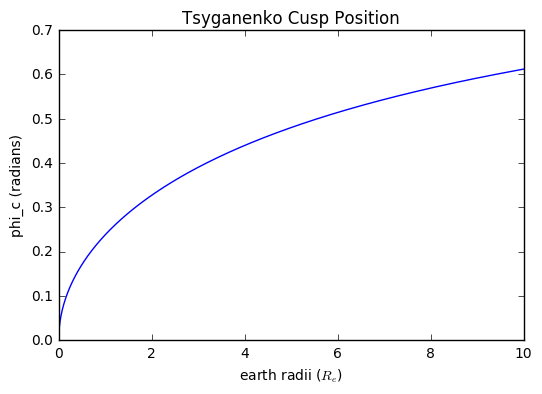

In [1]:
import tsyganenko as tsyg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from spacepy import coordinates as coord
import spacepy.time as spt
from spacepy.time import Ticktock
import datetime as dt
from mpl_toolkits.mplot3d import Axes3D

# find phi for a stationary cusp
r = np.linspace(0,10, 1000)
phi_c = tsyg.getPhi_c(r)
plt.plot(r,phi_c)
plt.ylabel('phi_c (radians)')
plt.xlabel('earth radii ($R_{e}$)')
plt.title('Tsyganenko Cusp Position')
plt.show()



Note that below, there are many ways that we could set up the subplot, but I just chose (programattically) to do it a certain way provided in http://matplotlib.org/examples/pylab_examples/subplots_demo.html

Note: The units for this system is solar magnetic degrees.  Some plots I did gave me that kind of bias to think that SM would be the best coordinate system for this. (That's probably not true but there are many ways to solve this problem).

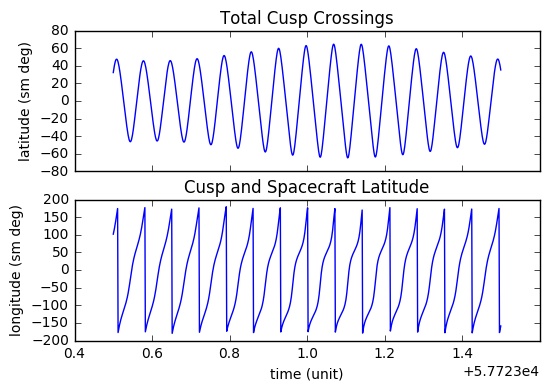

In [2]:
# the orbit is fairly easy to get 
df = pd.read_csv('oneday.csv')
t = df['DefaultSC.A1ModJulian'] + 29999.5
x = df['DefaultSC.gse.X']
y = df['DefaultSC.gse.Y']
z = df['DefaultSC.gse.Z']

# set the "ticks"
cvals = coord.Coords([[i,j,k] for i,j,k in zip(x,y,z)], 'GSE', 'car')
cvals.ticks = Ticktock(t,'MJD')
sm = cvals.convert('SM', 'sph')

lat = sm.lati
t = np.asarray(t)
# plotting stuff
f, axarr = plt.subplots(2, sharex=True)
# axarr[0].plot(t, y)
axarr[0].set_title('Total Cusp Crossings')
axarr[0].set_ylabel('latitude (sm deg)')
axarr[0].plot(sm.ticks.MJD, sm.lati)
axarr[1].set_title('Cusp and Spacecraft Latitude')
axarr[1].set_ylabel('longitude (sm deg)')
axarr[1].plot(sm.ticks.MJD, sm.long)

plt.xlabel('time (unit)')

plt.show()

The next thing to do is compute the cusp latitude and longitude using tsyganenko.  The cusp angular position is a function of radial distance from the earth as given in the Tsyganenko equation.  This means that different "tracks" will be given as we vary $R_{e}$.  Since I am using a very circular orbit, with $e \sim 0.02$, I will plot the cusp latitude and longitude below as a function of the spacecraft altitude in my GMAT file.  The semi major axis is given as $7191 km$, $\sim 1.127 R_{e}$.  

In [3]:
rs = 1.127 # average of the radius of the orbit
rs = np.array([1,2,3])
phic = tsyg.getPhi_c(rs)
print(np.isscalar(phic))
print("phi c", np.rad2deg(phic))
truequestionmark = tsyg.tsygCyl2Car(phic,rs)
# print("x,y,z",xt,yt,zt)
print(truequestionmark)

False
phi c [ 13.61935727  18.73856537  22.35983876]
type(phi_c) False
(array([ 0.23547047,  0.64250096,  1.14126668]), array([ 0.,  0.,  0.]), array([ 0.9718815 ,  1.89398852,  2.77443875]))
